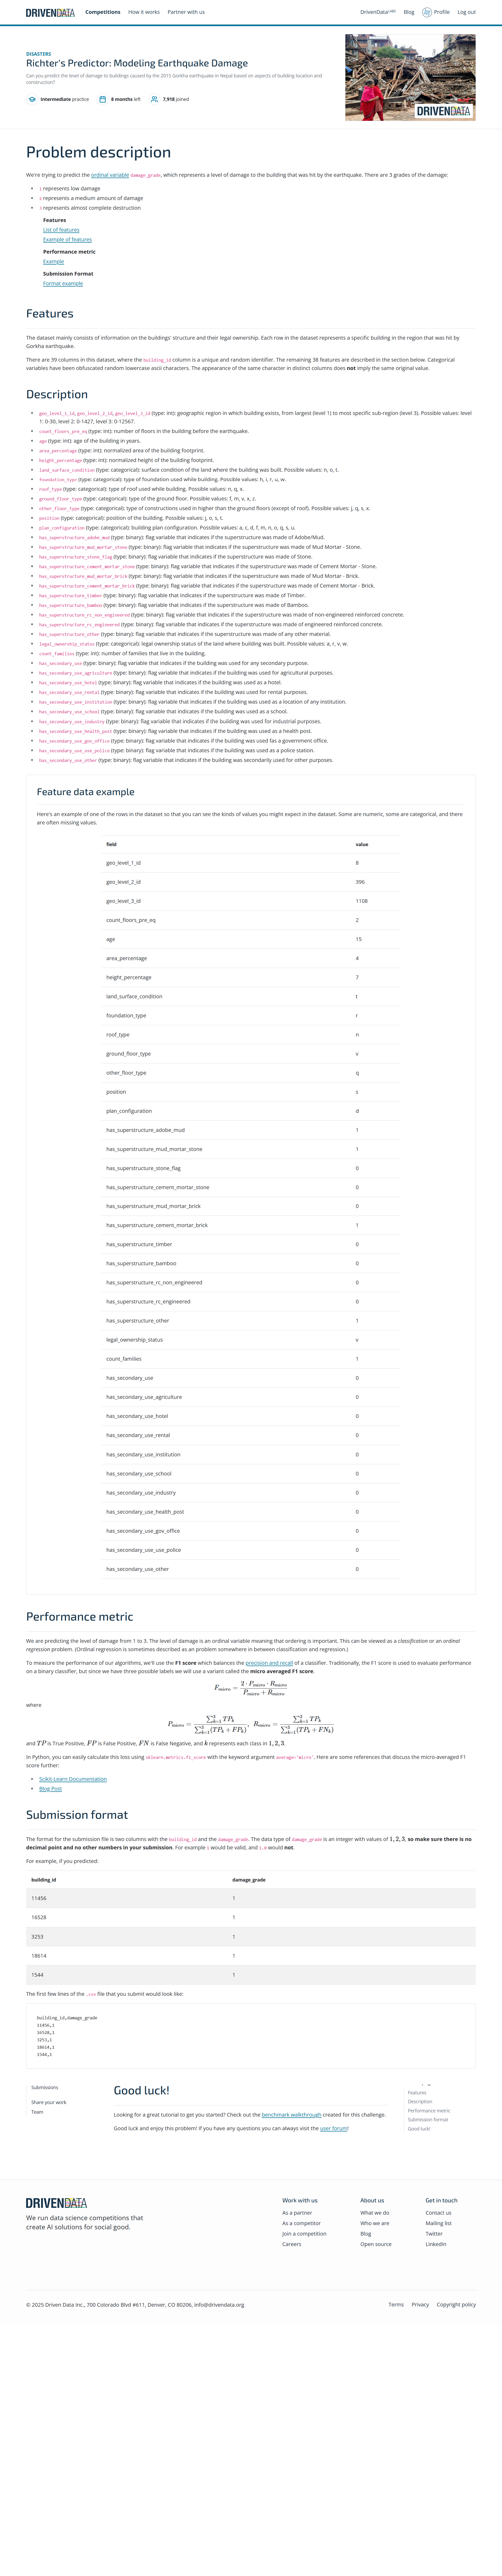

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
x=pd.read_csv("../Pandas Dataset/nepal_earthquake_train_values.csv")
y=pd.read_csv("../Pandas Dataset/nepal_earthquake_train_labels.csv")
x_test=pd.read_csv("E:\Data Science\Pandas Dataset\\nepal_earthquake_test_values.csv")

In [38]:
x.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = y['damage_grade']
y.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [41]:
x.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [4]:
catagorical_columns=x.select_dtypes(include=['object']).columns
x[catagorical_columns]

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v
...,...,...,...,...,...,...,...,...
260596,n,r,n,f,j,s,q,v
260597,t,r,n,f,q,s,d,v
260598,t,r,q,f,q,s,d,v
260599,t,r,x,v,s,j,d,v


In [5]:
x_test[catagorical_columns]

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,s,d,v
1,t,r,n,f,q,s,d,v
2,t,r,n,f,q,s,d,v
3,t,r,x,v,j,t,d,v
4,t,r,q,f,q,t,d,v
...,...,...,...,...,...,...,...,...
86863,t,r,q,f,q,t,d,w
86864,n,r,n,f,q,s,d,v
86865,t,r,n,f,j,s,d,v
86866,t,r,n,f,q,s,d,a


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in catagorical_columns:
    x[col] = le.fit_transform(x[col])
    

In [7]:
le = LabelEncoder()
for col in catagorical_columns:
    x_test[col] = le.fit_transform(x_test[col])
    

In [8]:
x.drop(columns=["building_id"],inplace=True)
x_test.drop(columns=["building_id"],inplace=True)
x.corr()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,0.030434,0.197030,0.040651,0.054917,-0.001010,-0.010528,0.032916,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,-0.092157,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,-0.034365,-0.034404,-0.090820,-0.093396,-0.015013,0.009542,-0.023195,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,0.034451,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015610,0.007081,-0.007506,-0.009068,-0.008843,0.011178,0.002842,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.035146,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.043832,-0.149130,0.091733,-0.048276,0.369606,-0.176834,-0.025296,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.092764,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.015866,-0.031302,-0.033532,-0.035342,0.010692,-0.048256,-0.004309,0.068032,0.001321,0.009129,-0.012128,0.079525,-0.036992,0.005855,-0.008374,-0.025431,-0.025552,-0.001520,0.023291,0.005309,-0.008788,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534
area_percentage,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.027887,-0.103044,0.259252,0.204712,0.109258,-0.040626,0.087245,0.026287,-0.225541,-0.000473,0.073701,0.053362,0.210800,-0.053965,-0.031641,0.185047,0.224647,0.007928,0.028479,0.088630,0.122401,-0.016478,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111
height_percentage,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.022876,-0.149241,0.165649,0.041635,0.348153,-0.148047,-0.005858,0.149725,-0.106573,-0.020260,0.012960,0.209098,0.001698,-0.052402,-0.063342,0.086228,0.129698,-0.019266,0.074417,0.064316,0.091780,-0.005390,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397
land_surface_condition,0.030434,-0.034365,-0.015610,0.043832,0.015866,0.027887,0.022876,1.000000,-0.009165,0.054031,0.016903,-0.030527,-0.025109,0.005437,0.010201,-0.079695,-0.045326,-0.011771,0.058683,0.058912,-0.041338,-0.027842,0.006346,0.027483,-0.035197,0.012540,0.008894,0.003745,-0.006204,0.009847,0.008792,0.003889,0.004538,0.002525,0.001176,0.000719,0.002937,-0.011874
foundation_type,0.197030,-0.034404,0.007081,-0.149130,-0.031302,-0.103044,-0.149241,-0.009165,1.0000

In [47]:
x.shape

(260601, 38)

In [48]:
x_test.shape

(86868, 38)

In [9]:
variance = x.var()
print(variance.sort_values())

has_secondary_use_use_police              8.825008e-05
has_secondary_use_gov_office              1.457961e-04
has_secondary_use_health_post             1.879923e-04
has_secondary_use_school                  3.605760e-04
has_secondary_use_institution             9.392543e-04
has_secondary_use_industry                1.069460e-03
has_secondary_use_other                   5.092753e-03
has_secondary_use_rental                  8.034919e-03
has_superstructure_other                  1.476011e-02
has_superstructure_rc_engineered          1.560803e-02
has_superstructure_cement_mortar_stone    1.790233e-02
has_secondary_use_hotel                   3.249553e-02
has_superstructure_stone_flag             3.315361e-02
has_superstructure_rc_non_engineered      4.077626e-02
has_secondary_use_agriculture             6.023380e-02
has_superstructure_mud_mortar_brick       6.350927e-02
has_superstructure_cement_mortar_brick    6.960327e-02
has_superstructure_bamboo                 7.778458e-02
has_supers

In [50]:
x.loc[:, variance > .1]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_timber,count_families
0,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,0,1
1,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,1,0,1
2,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,1,0,1
3,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,1,1,1
4,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,2,0,0,0,2,7,1,0,1
260597,17,715,2060,2,0,6,5,2,2,0,0,1,2,2,1,0,1
260598,17,51,8163,3,55,6,7,2,2,1,0,1,2,2,1,0,1
260599,26,39,1851,2,10,14,6,2,2,2,2,2,0,2,0,0,1


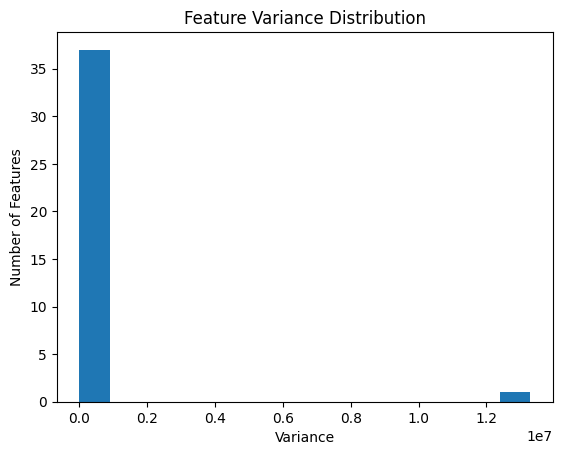

In [51]:
import matplotlib.pyplot as plt

plt.hist(variance, bins=15)
plt.xlabel("Variance")
plt.ylabel("Number of Features")
plt.title("Feature Variance Distribution")
plt.show()

In [52]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1) 
selector.fit(x)
selector.fit(x_test)
x = x.loc[:, selector.get_support()]  # Keeps original DataFrame format
x_test = x_test.loc[:, selector.get_support()]

In [53]:
x.shape

(260601, 17)

In [55]:
x_test.shape

(86868, 17)

In [57]:
x.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_timber,count_families
0,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,0,1
1,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,1,0,1
2,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,1,0,1
3,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,1,1,1
4,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,0,0,1


In [61]:
from mord import LogisticAT

model=LogisticAT(alpha=1.0) 
model.fit(x,y)

y_pred=model.predict(x_test)

In [65]:
y_pred

array([3, 2, 2, ..., 2, 2, 2])

In [66]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'alpha': np.logspace(-3, 2, 20)}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x, y)

print("Best alpha:", random_search.best_params_['alpha'])

best_model = LogisticAT(alpha=random_search.best_params_['alpha'])
best_model.fit(x, y)

y_pred = best_model.predict(x_test)


Best alpha: 54.555947811685144


In [69]:
model=LogisticAT(alpha=10.0) 
model.fit(x,y)

y_pred=model.predict(x_test)

In [70]:
x_test3=pd.read_csv("E:\Data Science\Pandas Dataset\\nepal_earthquake_test_values.csv")
df=pd.DataFrame({"building_id":x_test3['building_id'], "damage_grade":y_pred} )
df["damage_grade"]=df["damage_grade"].astype(int)
df.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


0.5675

jubayer1202
id-278733
⸱
23h 4min ago

In [71]:
df.to_csv("earthquake_damage.csv",index=False)

In [18]:
import lightgbm as lgb
import numpy as np

# Train LGBM model
lgb_model = lgb.LGBMClassifier(boosting_type="gbdt", objective="multiclass", 
                               num_class=len(np.unique(y)), 
                               learning_rate=0.05, num_leaves=31, 
                               n_estimators=1000, random_state=42)

lgb_model.fit(x, y)  # No need for encoding

# Make predictions for the test set
y_pred = lgb_model.predict(x_test)

# Print predictions
print(y_pred)  # These are already in the form of 1, 2,

# Predictions

[3 2 2 ... 2 2 1]


In [19]:
x_test3=pd.read_csv("E:\Data Science\Pandas Dataset\\nepal_earthquake_test_values.csv")
df=pd.DataFrame({"building_id":x_test3['building_id'], "damage_grade":y_pred} )
df["damage_grade"]=df["damage_grade"].astype(int)
df.head()

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [20]:
df.to_csv("earthquake_damage.csv",index=False)

#1110

jubayer1202
0min ago
⸱
7 submissions
0.7373

https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/